This Notebook is showing what you can do with simple linear regression techniques. The data is obtained from a website called koopwoningen using a basic parser.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

Read the data from the file, the first row of the file contains the headers.

*Note to self* If the first line contains a space after a comma, the name of the header also contains the space

In [3]:
house = pd.read_csv('2_all_houses.txt')

In [4]:
house

,NumberOfRooms,SquareFootage,Price,YearBuilt,Type,Address,City
0,3,61,284500,1983,Appartement,Nes 96,Pijnacker
1,4,104,375000,1983,Woonhuis,Roggeakker 23,Pijnacker
2,4,277,1075000,2006,Woonhuis,Katwijkerlaan 119,Pijnacker
3,5,101,450000,2002,Woonhuis,Rodenrijseweg 547,Berkel en Rodenrijs
4,6,140,600000,2002,Woonhuis,Gouden Harplaan 27,Berkel en Rodenrijs
...,...,...,...,...,...,...,...
368,9,280,1695000,1985,Woonhuis,Ringvaartweg 211,Rotterdam
369,4,111,730000,1985,Appartement,Baan 54 S,Rotterdam
370,3,101,725000,1985,Appartement,Baan 50 M,Rotterdam
371,4,140,969000,1985,Appartement,Baan 56 C,Rotterdam


In [5]:
prices = house["Price"]
number_of_rooms = house["NumberOfRooms"]

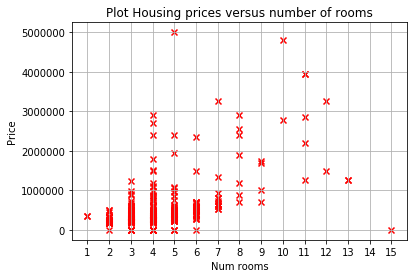

In [6]:
tick_spacing = 1
fig, ax = plt.subplots(1,1)

ax.scatter(number_of_rooms, prices, c='r',marker='x')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Plot Housing prices versus number of rooms')
plt.ylabel('Price')
plt.xlabel('Num rooms')
plt.rcParams["figure.figsize"] = (6,8)
plt.grid()
plt.show()

In [7]:
import sys
!{sys.executable} -m pip install turicreate

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [8]:
import turicreate as tc

In [9]:
data = tc.SFrame("2_all_houses.txt")

Assuming file is csv. For other delimiters, please use `SFrame.read_csv`.


Finished parsing file /root/ml-introduction/2_all_houses.txt

Parsing completed. Parsed 100 lines in 0.210085 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /root/ml-introduction/2_all_houses.txt

Parsing completed. Parsed 373 lines in 0.042903 secs.

In [10]:
data

NumberOfRooms,SquareFootage,Price,YearBuilt,Type,Address,City
3,61,284500,1983,Appartement,Nes 96,Pijnacker
4,104,375000,1983,Woonhuis,Roggeakker 23,Pijnacker
4,277,1075000,2006,Woonhuis,Katwijkerlaan 119,Pijnacker
5,101,450000,2002,Woonhuis,Rodenrijseweg 547,Berkel en Rodenrijs
6,140,600000,2002,Woonhuis,Gouden Harplaan 27,Berkel en Rodenrijs
5,104,350000,2002,Woonhuis,Wilhelminastraat 98,Berkel en Rodenrijs
6,128,575000,2002,Woonhuis,Stationssingel 6,Berkel en Rodenrijs
5,128,600000,1980,Woonhuis,Rozendaallaan 7,Berkel en Rodenrijs
6,140,700000,1980,Woonhuis,Cissy vanMarxveldtplantsoen 9 ...,Berkel en Rodenrijs
5,97,525000,1980,Woonhuis,Rodenrijseweg 549,Berkel en Rodenrijs


In [11]:
data_filtered = data[data['Price'] < 1000000] 

In [12]:
data_filtered.materialize()

In [13]:
data_filtered

NumberOfRooms,SquareFootage,Price,YearBuilt,Type,Address,City
3,61,284500,1983,Appartement,Nes 96,Pijnacker
4,104,375000,1983,Woonhuis,Roggeakker 23,Pijnacker
5,101,450000,2002,Woonhuis,Rodenrijseweg 547,Berkel en Rodenrijs
6,140,600000,2002,Woonhuis,Gouden Harplaan 27,Berkel en Rodenrijs
5,104,350000,2002,Woonhuis,Wilhelminastraat 98,Berkel en Rodenrijs
6,128,575000,2002,Woonhuis,Stationssingel 6,Berkel en Rodenrijs
5,128,600000,1980,Woonhuis,Rozendaallaan 7,Berkel en Rodenrijs
6,140,700000,1980,Woonhuis,Cissy vanMarxveldtplantsoen 9 ...,Berkel en Rodenrijs
5,97,525000,1980,Woonhuis,Rodenrijseweg 549,Berkel en Rodenrijs
5,152,500000,1980,Woonhuis,Lingestraat 61,Berkel en Rodenrijs


In [14]:
model = tc.linear_regression.create(data_filtered, features=['NumberOfRooms'],target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 319

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.000474     | 878245.164111      | 429248.698601        | 186806.096480                   | 191276.520460                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [15]:
new_house = tc.SFrame({'NumberOfRooms':[0]})
model.predict(new_house)

dtype: float
Rows: 1
[183480.80586707423]

In [16]:
model.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 319
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.001

Settings
--------
Residual sum of squares        : 11131989140612.814
Training RMSE                  : 186806.0965

Highest Positive Coefficients
-----------------------------
(intercept)                    : 183480.8059
NumberOfRooms                  : 46317.6239

Lowest Negative Coefficients
----------------------------
No Negative Coefficients       : 



In [17]:
# https://www.geeksforgeeks.org/polynomial-regression-using-turicreate/
def createSframe(inputs, pol_degree):
    datapoints = tc.SFrame({'x1': inputs})
    for degree in range(2, pol_degree+1):
        datapoints[f'x{degree}'] = datapoints[f'x{degree-1}']*datapoints['x1']
    return datapoints

In [86]:
data_points = createSframe(data_filtered["NumberOfRooms"], 20)
data_points['y'] = data_filtered["Price"]

In [87]:
data_points

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
3,9,27,81,243,729,2187,6561,19683,59049,177147,531441,1594323
4,16,64,256,1024,4096,16384,65536,262144,1048576,4194304,16777216,67108864
5,25,125,625,3125,15625,78125,390625,1953125,9765625,48828125,244140625,1220703125
6,36,216,1296,7776,46656,279936,1679616,10077696,60466176,362797056,2176782336,13060694016
5,25,125,625,3125,15625,78125,390625,1953125,9765625,48828125,244140625,1220703125
6,36,216,1296,7776,46656,279936,1679616,10077696,60466176,362797056,2176782336,13060694016
5,25,125,625,3125,15625,78125,390625,1953125,9765625,48828125,244140625,1220703125
6,36,216,1296,7776,46656,279936,1679616,10077696,60466176,362797056,2176782336,13060694016
5,25,125,625,3125,15625,78125,390625,1953125,9765625,48828125,244140625,1220703125
5,25,125,625,3125,15625,78125,390625,1953125,9765625,48828125,244140625,1220703125


In [88]:
polynomial_power = 15
features = [f'x{i}' for i in range(1, polynomial_power)]
poly_model = tc.linear_regression.create(data_points, features=features, target='y')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 319

Number of features          : 14

Number of unpacked features : 14

Number of coefficients    : 15

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.002553     | 679188.711407      | 359188.711407        | 177093.618100                   | 160251.617439                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [89]:
poly_model.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 15
Number of examples             : 319
Number of feature columns      : 14
Number of unpacked features    : 14

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0137

Settings
--------
Residual sum of squares        : 10004525713375.113
Training RMSE                  : 177093.6181

Highest Positive Coefficients
-----------------------------
(intercept)                    : 222403.7063
x1                             : 55916.7871
x3                             : 1207.257
x4                             : 148.6526
x11                            : 0.0

Lowest Negative Coefficients
----------------------------
x2                  

In [90]:
def predict_price_linear(num_rooms):
    predicted_prices = []
    for n in num_rooms:
        new_house = tc.SFrame({'NumberOfRooms':[n]})
        predicted_prices.append(model.predict(new_house))
    return predicted_prices

In [107]:
def predict_price_poly(num_rooms, power, model):
    predicted_prices = []
    for n in num_rooms:
        new_house = createSframe([n], power)
        predicted_prices.append(model.predict(new_house))
    return predicted_prices

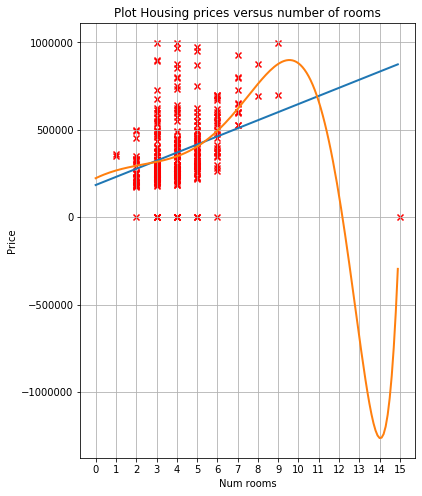

In [108]:
tick_spacing = 1
fig, ax = plt.subplots(1,1)

t = np.arange(0.0, 15.0, 0.1)
linear = predict_price_linear(t)
poly = predict_price_poly(t, polynomial_power, poly_model)

ax.scatter(data_points["x1"], data_points["y"], c='r',marker='x')
ax.plot(t, linear, lw=2)
ax.plot(t, poly, lw=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Plot Housing prices versus number of rooms')
plt.ylabel('Price')
plt.xlabel('Num rooms')
plt.rcParams["figure.figsize"] = (6,8)
plt.grid()
plt.show()

In [93]:
train, test = data_points.random_split(.8)

In [118]:
model_no_reg = tc.linear_regression.create(train, target='y', l1_penalty=0.0, l2_penalty=0.0)
model_L1_reg = tc.linear_regression.create(train, target='y', l1_penalty=1, l2_penalty=0.0)
model_L2_reg = tc.linear_regression.create(train, target='y', l1_penalty=0.0, l2_penalty=1)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 242

Number of features          : 20

Number of unpacked features : 20

Number of coefficients    : 21

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.001464     | 668083.333306      | 1322087611514.401123 | 182566.622876                   | 366681146114.513672               |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 242

Number of features          : 20

Number of unpacked features : 20

Number of coefficients    : 21

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 0         | 1        | 1.000000  | 0.013472     | 997500.000000      | 700000.000000        | 426006.485905                   | 371271.256838                     |

| 1         | 2        | 0.000451  | 0.018275     | 1627836.342091     | 379555.835530        | 268128.762611                   | 145010.554867                     |

| 2         | 3        | 0.000134  | 0.022800     | 814094.622077      | 358707.578731        | 235440.521439                   | 134035.647972                     |

| 3         | 4        | 0.000134  | 0.024654     | 791263.357839      | 315450.569546        | 219471.833542                   | 110925.716303                     |

| 4         | 5        | 0.000134  | 0.026354     | 769827.216904      | 277285.684783        | 206912.762360                   | 96180.445525                      |

| 5         | 6        | 0.000134  | 0.027632     | 749942.707142      | 241631.081353        | 198430.867526                   | 89158.532945                      |

| 10        | 11       | 0.000134  | 0.032636     | 698633.028296      | 160029.697889        | 190367.391976                   | 107212.621903                     |

+-----------+----------+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

Completed (Iteration limit reached).

This model may not be optimal. To improve it, consider increasing `max_iterations`.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 242

Number of features          : 20

Number of unpacked features : 20

Number of coefficients    : 21

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.008219     | 672128.548941      | 356101.639721        | 185960.474236                   | 138997.804259                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [119]:
predicted_no_reg = model_no_reg.predict(test)
predicted_l1_reg = model_L1_reg.predict(test)
predicted_l2_reg = model_L2_reg.predict(test)

In [120]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [121]:
rmse(predicted_no_reg, test["y"])

45153361.43231168

In [122]:
rmse(predicted_l1_reg, test["y"])

158077.331963879

In [123]:
rmse(predicted_l2_reg, test["y"])

153374.06633513456

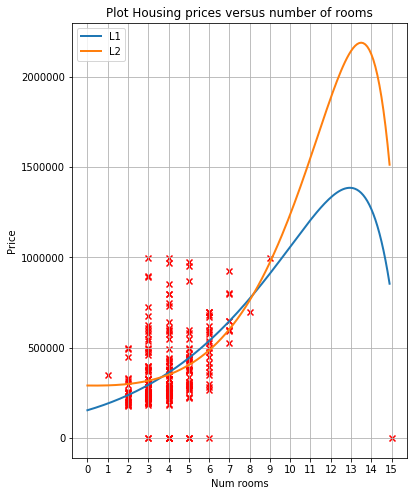

In [125]:
tick_spacing = 1
fig, ax = plt.subplots(1,1)

t = np.arange(0.0, 15.0, 0.1)
poly_no_reg = predict_price_poly(t, polynomial_power, model_no_reg)
poly_l1_reg = predict_price_poly(t, polynomial_power, model_L1_reg)
poly_l2_reg = predict_price_poly(t, polynomial_power, model_L2_reg)

ax.scatter(train["x1"], train["y"], c='r',marker='x')
# ax.plot(t, poly_no_reg, lw=2)
ax.plot(t, poly_l1_reg, lw=2, label='L1')
ax.plot(t, poly_l2_reg, lw=2, label='L2')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.title('Plot Housing prices versus number of rooms')
plt.ylabel('Price')
plt.xlabel('Num rooms')
plt.rcParams["figure.figsize"] = (6,8)
plt.legend()
plt.grid()
plt.show()